# Import librerie e oggetti
* **pandas** per la manipolazione dei dati in formato tabellare 
* **sklearn (Scikit-learn)** per l'utilizzo di algoritmi di apprendimento
    * *LabelEncoder*, strumento ausialiario per convertire i valori delle categorie in altri di tipo numerico.
    * *LogisticRegression*, classificatore che implementa una Regressione lineare regolarizzata
* **matplotlib** per la visualizzazione dei dati
* **numpy** per il supporto ulteriore alla manipolazione dei dati
* **<item.csv>** file csv contenente i dati di train/test

In [ ]:
!sudo apt update && sudo apt install -y graphviz

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
#importa i csv
dataframe_train = pd.read_csv('train.csv', error_bad_lines=False,dtype=str)
dataframe_test = pd.read_csv('test.csv', error_bad_lines=False,dtype=str)

# Pre-processing
Prima di effettuare l'addestramento del modello, lo si preparara.<br>
Tre operazioni eseguite in questo caso:
* **encoding** dei campi di ogni ennupla in valori numerici
* **analisi dei dati** per cercare delle feature non significative
* **split** dei dati tra feature(X_...) e valore atteso(y_...)

In [5]:
#visualizza il dataset a grandi linee
dataframe_train

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,6729-FZWSY,Male,0,No,No,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.45,1195.95
1,No,4806-DXQCE,Female,1,Yes,No,70,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,113.65,7714.65
2,No,8690-ZVLCL,Female,0,Yes,Yes,68,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),88.0,6161.9
3,No,1530-ZTDOZ,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
4,No,4006-HKYHO,Male,0,No,No,63,Yes,No,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),86.7,5309.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,Yes,1271-SJBGZ,Male,1,No,No,12,No,No phone service,DSL,...,No,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,43.65,526.95
4503,No,5977-CKHON,Female,0,Yes,Yes,43,Yes,Yes,Fiber optic,...,No,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),92.55,4039
4504,No,3635-JBPSG,Female,0,No,No,15,No,No phone service,DSL,...,Yes,No,No,No,Yes,Two year,Yes,Mailed check,38.8,603
4505,No,4475-NVTLU,Male,0,Yes,Yes,45,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,19.2,903.7


In [6]:
#verifica se ci sono dei valori nulli nelle colonne
dataframe_train.isnull().any()

Churn               False
customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
dtype: bool

In [7]:
#conta il numero di valori diversi per ogni colonna
#l'idea è che se una colonna ha un solo valore, questo non è discriminante -> entropia=0
print(dataframe_train.nunique())

Churn                  2
customerID          4507
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1391
TotalCharges        4276
dtype: int64


In [8]:
#effettua l'encoding dei valori string in interi per applicare diversi metododi tra cui 
#fit e correlazione tra le features
le = LabelEncoder()
dataframe_train_encoded = dataframe_train.apply(le.fit_transform)
dataframe_test_encoded = dataframe_test.apply(le.fit_transform)

In [9]:
#visualizza la corrrelazione tra le features
print(dataframe_train_encoded.corr())

                     Churn  customerID    gender  SeniorCitizen   Partner  \
Churn             1.000000   -0.027114 -0.022549       0.134412 -0.143061   
customerID       -0.027114    1.000000  0.018513      -0.002807 -0.036953   
gender           -0.022549    0.018513  1.000000      -0.012136 -0.016511   
SeniorCitizen     0.134412   -0.002807 -0.012136       1.000000  0.008909   
Partner          -0.143061   -0.036953 -0.016511       0.008909  1.000000   
Dependents       -0.150624   -0.028092  0.001914      -0.204271  0.447827   
tenure           -0.252365    0.001787 -0.020847       0.012456  0.269370   
PhoneService     -0.001683   -0.021880 -0.008289       0.000015  0.025966   
MultipleLines     0.028223    0.008166 -0.006730       0.134285  0.141576   
InternetService  -0.053783   -0.018253 -0.012326      -0.043445 -0.002856   
OnlineSecurity   -0.278851    0.022304 -0.026166      -0.124415  0.152014   
OnlineBackup     -0.190786   -0.004783 -0.028936      -0.001390  0.153641   

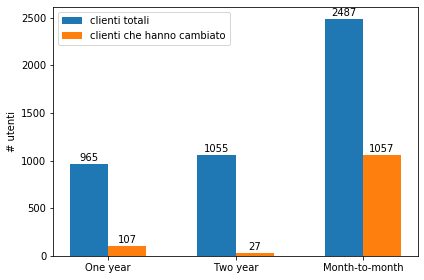

In [10]:
# dall'analisi precedente mi sorge il dubbio che il valore target è influenzato da diverse features.
# corelazione positiva: SeniorCitizen[0.134412], PaperlessBilling[0.198045], PaymentMethod[0.105578], MonthlyCharges[0.155157]
# correlazione negativa: Partner[-0.143061], Dependents[-0.150624], tenure[-0.252365], OnlineBackup[-0.190786], DeviceProtection[-0.174456], TechSupport[-0.280270], Contract[-0.396171]
# tra queste, quella sicuramente più significativa è la feature Contract[-0.396171]

# dei diversi valori di Contract sono curioso di vedere quelli che hanno deciso di cambiare
# per ogni tipo di contratto salva una ennupla
# (tipo contratto, clienti con quel tipo di contratto, clienti con quel tipo di contratto che hanno cambiato)

lista_numero_di_utenti_per_tipo=[]
tipi_contratti = dataframe_train['Contract'].unique()
for tipo_contratto in tipi_contratti:
    lista_numero_di_utenti_per_tipo.append((tipo_contratto, dataframe_train.Contract.eq(tipo_contratto).sum(), dataframe_train[(dataframe_train.Contract == tipo_contratto) & (dataframe_train.Churn== 'Yes')].shape[0]))


labels = [x[0] for x in lista_numero_di_utenti_per_tipo]
total_clients = [x[1] for x in lista_numero_di_utenti_per_tipo]
churn_clients = [x[2] for x in lista_numero_di_utenti_per_tipo]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, total_clients, width, label='clienti totali')
rects2 = ax.bar(x + width/2, churn_clients, width, label='clienti che hanno cambiato')


ax.set_ylabel('# utenti')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

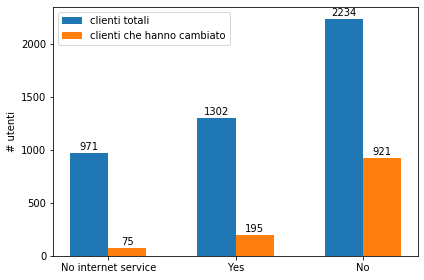

In [11]:
# La seconda features molto significativa è TechSupport[-0.280270]
# riapplico il ragionamento per ricostruirmi il grafico relativo a questa feature

# dei diversi valori di TechSupport sono curioso di vedere quelli che hanno deciso di cambiare

lista_numero_di_utenti_per_tipo_Tech=[]
tipi_TechSupport = dataframe_train['TechSupport'].unique()
for tipo_TechSupport in tipi_TechSupport:
    lista_numero_di_utenti_per_tipo_Tech.append((tipo_TechSupport, dataframe_train.TechSupport.eq(tipo_TechSupport).sum(), dataframe_train[(dataframe_train.TechSupport == tipo_TechSupport) & (dataframe_train.Churn== 'Yes')].shape[0]))


labels = [x[0] for x in lista_numero_di_utenti_per_tipo_Tech]
total_clients = [x[1] for x in lista_numero_di_utenti_per_tipo_Tech]
churn_clients = [x[2] for x in lista_numero_di_utenti_per_tipo_Tech]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, total_clients, width, label='clienti totali')
rects2 = ax.bar(x + width/2, churn_clients, width, label='clienti che hanno cambiato')


ax.set_ylabel('# utenti')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

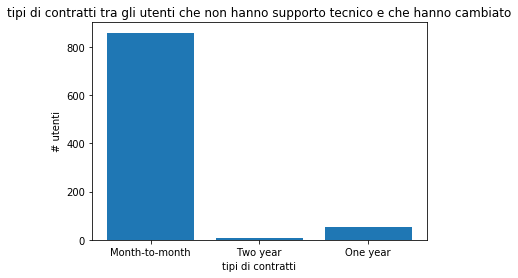

In [12]:
# La maggior parte degli utenti che non possiedono il supporto tecnico e che hanno lasciato la società avevano un contratto mensile
# ciò lo si nota dal grafico successivo

labels = ['Month-to-month', 'Two year', 'One year']
total_clients = [dataframe_train[(dataframe_train.TechSupport == 'No') & (dataframe_train.Contract== 'Month-to-month') & (dataframe_train.Churn== 'Yes')].shape[0], dataframe_train[(dataframe_train.TechSupport == 'No') & (dataframe_train.Contract== 'Two year') & (dataframe_train.Churn== 'Yes')].shape[0]
, dataframe_train[(dataframe_train.TechSupport == 'No') & (dataframe_train.Contract== 'One year') & (dataframe_train.Churn== 'Yes')].shape[0]]
churn_clients = [x[2] for x in lista_numero_di_utenti_per_tipo_Tech]

plt.bar(labels,total_clients)
plt.title('tipi di contratti tra gli utenti che non hanno supporto tecnico e che hanno cambiato')
plt.xlabel('tipi di contratti')
plt.ylabel('# utenti')
plt.show()

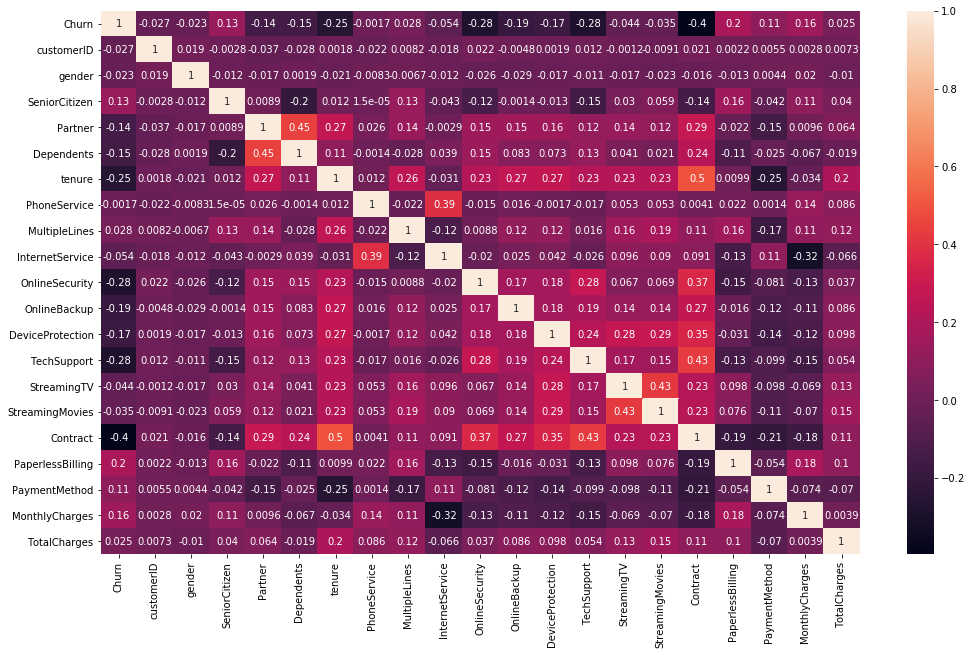

In [13]:
# ritorniamo sulla analisi della correlazione tra le feature
plt.figure(figsize=(17,10))
ax = sns.heatmap(dataframe_train_encoded.corr(), annot=True)

In [14]:
# dall'analisi si evince che le seguenti features non influenzano il valore target 
# customerID, gender, PhoneService, MultipleLines, InternetService, StreamingTV, StreamingMovies
# elimino queste feature dal dataset
dataframe_train_encoded.drop(["customerID", "gender", "PhoneService", "MultipleLines", "InternetService", "StreamingTV", "StreamingMovies"], axis = 1, inplace = True)
dataframe_train.drop(["customerID", "gender", "PhoneService", "MultipleLines", "InternetService", "StreamingTV", "StreamingMovies"], axis = 1, inplace = True)

dataframe_test_encoded.drop(["customerID", "gender", "PhoneService", "MultipleLines", "InternetService", "StreamingTV", "StreamingMovies"], axis = 1, inplace = True)
dataframe_test.drop(["customerID", "gender", "PhoneService", "MultipleLines", "InternetService", "StreamingTV", "StreamingMovies"], axis = 1, inplace = True)

In [15]:
#splitta i dati di train per avere feature (X_train) e target (y_train)
y_train = dataframe_train_encoded.pop('Churn')
X_train = dataframe_train_encoded

#splitta i dati di test per avere feature (X_test) e target (y_train)
y_test = dataframe_test_encoded.pop('Churn')
X_test = dataframe_test_encoded

## Logistic Regression

In [16]:
#addestra il modello
model = LogisticRegression(max_iter=260)
result = model.fit(X_train, y_train)
print("Test set accuracy: {:.3f}".format(result.score(X_test, y_test)))

Test set accuracy: 0.770
